In [1]:
import tensorflow

2022-11-16 12:35:01.054724: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 12:35:01.770568: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 12:35:01.770637: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-16 12:35:01.933237: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 12:35:04.094089: W tensorflow/stream_executor/platform/de

In [73]:
import numpy

In [93]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [75]:
(x_train, y_train),(x_test,y_test) = tensorflow.keras.datasets.mnist.load_data()

In [76]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
x_train = numpy.array(x_train)
x_test = numpy.array(x_test)

60000
60000
10000
10000


In [77]:
import matplotlib.pyplot as plt

In [78]:
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [79]:
x_train = x_train/225
x_test = x_test/225

In [80]:
print(x_train[0])
print(y_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

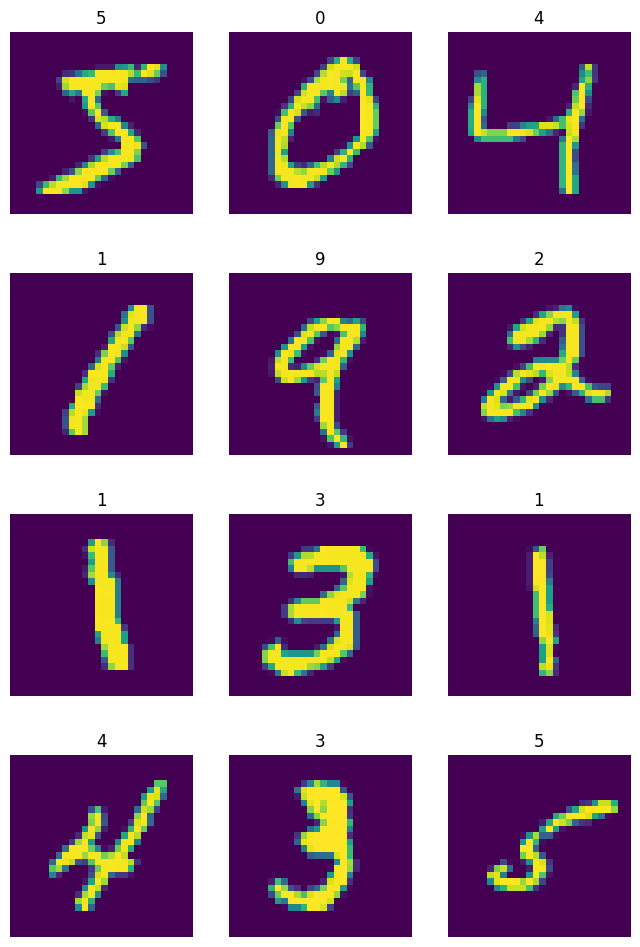

In [81]:
fig = plt.figure(figsize=(8.0,12.0))
rows=4
columns=3
for i in range(rows*columns):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis("off")

In [82]:
x_train.shape

(60000, 28, 28)

In [83]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_train.shape

(60000, 784)

In [84]:
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_test.shape

(10000, 784)

In [112]:
model = Sequential()

In [113]:
model.add(Input(shape=(x_train.shape[-1])))

In [114]:
model.add(Dense(256, activation='relu',))

In [115]:
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [116]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 1024)              263168    
                                                                 
 dense_14 (Dense)            (None, 10)                10250     
                                                                 
Total params: 474,378
Trainable params: 474,378
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [118]:
hist = model.fit(x=x_train, y=y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1919 - accuracy: 0.9407
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0829 - accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0612 - accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0473 - accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0389 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0315 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0298 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0258 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0220 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [119]:
history = model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0991 - accuracy: 0.9808


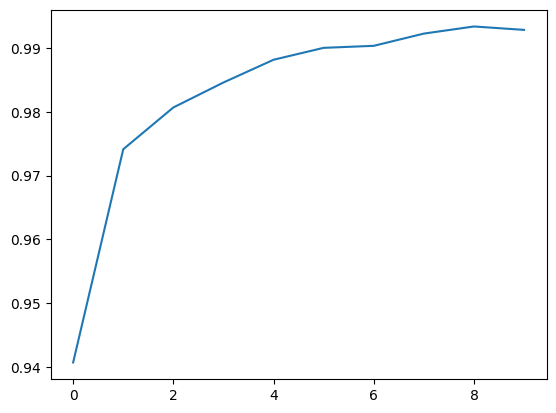

In [122]:
plt.plot(hist.epoch, hist.history['accuracy'])

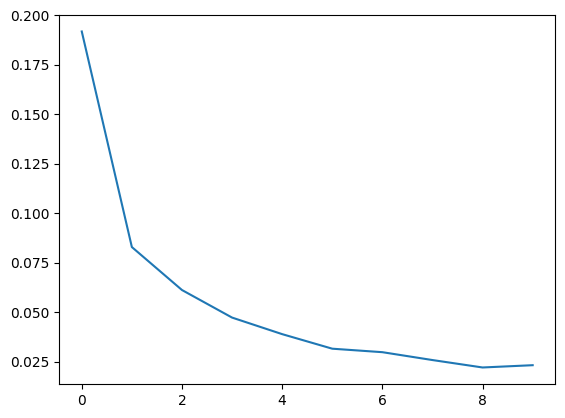

In [123]:
plt.plot(hist.epoch, hist.history['loss'])

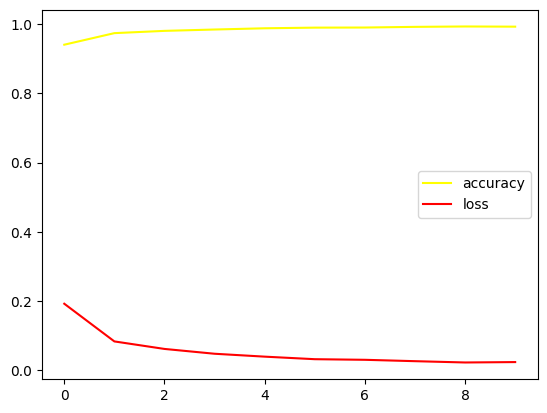

In [125]:
plt.plot(hist.history['accuracy'], c='yellow')
plt.plot(hist.history['loss'], c='red')
plt.legend(['accuracy','loss'])